# cleaning and processing

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from pathlib import Path
from ast import literal_eval

# Lire uniquement les 500 000 premières lignes
df = pd.read_csv(
    Path("../input/recipenlg/dataset/full_dataset.csv"), 
    nrows=500000, converters={"ingredients": literal_eval, "directions": literal_eval, "NER":literal_eval})

In [52]:
df

,Unnamed: 0,title,ingredients,directions,link,source,NER
0,0,No-Bake Nut Cookies,"[1 c. firmly packed brown sugar, 1/2 c. evapor...","[In a heavy 2-quart saucepan, mix brown sugar,...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[brown sugar, milk, vanilla, nuts, butter, bit..."
1,1,Jewell Ball'S Chicken,"[1 small jar chipped beef, cut up, 4 boned chi...","[Place chipped beef on bottom of baking dish.,...",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[beef, chicken breasts, cream of mushroom soup..."
2,2,Creamy Corn,"[2 (16 oz.) pkg. frozen corn, 1 (8 oz.) pkg. c...","[In a slow cooker, combine all ingredients. Co...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[frozen corn, cream cheese, butter, garlic pow..."
3,3,Chicken Funny,"[1 large whole chicken, 2 (10 1/2 oz.) cans ch...","[Boil and debone chicken., Put bite size piece...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[chicken, chicken gravy, cream of mushroom sou..."
4,4,Reeses Cups(Candy),"[1 c. peanut butter, 3/4 c. graham cracker cru...",[Combine first four ingredients and press in 1...,www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[peanut butter, graham cracker crumbs, butter,..."
...,...,...,...,...,...,...,...
499995,499995,Cranberry Chutney,"[1 bag fresh cranberries, 1 1/2 c. sugar, 1 c....","[Wash and sort cranberries., Mix sugar, marmal...",www.cookbooks.com/Recipe-Details.aspx?id=716301,Gathered,"[fresh cranberries, sugar, walnuts, lemon]"
499996,499996,Apple Cranberry Crisp,"[4 c. diced apples, 1 c. whole cranberries, 1 ...","[Combine apples, cranberries and granulated su...",www.cookbooks.com/Recipe-Details.aspx?id=421143,Gathered,"[apples, cranberries, sugar, oatmeal, brown su..."
499997,499997,Cheeseburger Casserole,"[2 lb. hamburger, sliced cheese, 1 can cream o...",[Brown hamburger and mix with soup; place in b...,www.cookbooks.com/Recipe-Details.aspx?id=964344,Gathered,"[hamburger, cheese, cream of mushroom soup]"
499998,499998,Sloppy Joes,"[1 c. chopped onions, 1/4 c. green pepper, 2 l...",[Cook ground beef with onions and green pepper...,www.cookbooks.com/Recipe-Details.aspx?id=594849,Gathered,"[onions, green pepper, ground beef, tomato sau..."


In [53]:
print(df['link'])

0          www.cookbooks.com/Recipe-Details.aspx?id=44874
1         www.cookbooks.com/Recipe-Details.aspx?id=699419
2          www.cookbooks.com/Recipe-Details.aspx?id=10570
3         www.cookbooks.com/Recipe-Details.aspx?id=897570
4         www.cookbooks.com/Recipe-Details.aspx?id=659239
                               ...                       
499995    www.cookbooks.com/Recipe-Details.aspx?id=716301
499996    www.cookbooks.com/Recipe-Details.aspx?id=421143
499997    www.cookbooks.com/Recipe-Details.aspx?id=964344
499998    www.cookbooks.com/Recipe-Details.aspx?id=594849
499999    www.cookbooks.com/Recipe-Details.aspx?id=461043
Name: link, Length: 500000, dtype: object


In [54]:
df.columns

Index(['Unnamed: 0', 'title', 'ingredients', 'directions', 'link', 'source',
       'NER'],
      dtype='object')

In [55]:
df.rename(columns={'Unnamed: 0': 'ID','directions': 'procedure', 'title': 'name'},inplace=True, errors='raise')

In [56]:
print(df.head())

   ID                   name  \
0   0    No-Bake Nut Cookies   
1   1  Jewell Ball'S Chicken   
2   2            Creamy Corn   
3   3          Chicken Funny   
4   4   Reeses Cups(Candy)     

                                         ingredients  \
0  [1 c. firmly packed brown sugar, 1/2 c. evapor...   
1  [1 small jar chipped beef, cut up, 4 boned chi...   
2  [2 (16 oz.) pkg. frozen corn, 1 (8 oz.) pkg. c...   
3  [1 large whole chicken, 2 (10 1/2 oz.) cans ch...   
4  [1 c. peanut butter, 3/4 c. graham cracker cru...   

                                           procedure  \
0  [In a heavy 2-quart saucepan, mix brown sugar,...   
1  [Place chipped beef on bottom of baking dish.,...   
2  [In a slow cooker, combine all ingredients. Co...   
3  [Boil and debone chicken., Put bite size piece...   
4  [Combine first four ingredients and press in 1...   

                                              link    source  \
0   www.cookbooks.com/Recipe-Details.aspx?id=44874  Gathered   
1  ww

In [57]:
df = df.astype({'ID': int, 
                'name': str,
                'ingredients': 'object', 
                'procedure': 'object', 
                'NER': 'object'})

# Adding extra columns
The variations in ingredients and their quantities across recipes, as well as the number of steps in each recipe, are of interest.

In [58]:
df['n_NER'] = df['NER'].apply(len)
df['n_procedures'] = df['procedure'].apply(len)

In [59]:
df.head()

,ID,name,ingredients,procedure,link,source,NER,n_NER,n_procedures
0,0,No-Bake Nut Cookies,"[1 c. firmly packed brown sugar, 1/2 c. evapor...","[In a heavy 2-quart saucepan, mix brown sugar,...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[brown sugar, milk, vanilla, nuts, butter, bit...",6,6
1,1,Jewell Ball'S Chicken,"[1 small jar chipped beef, cut up, 4 boned chi...","[Place chipped beef on bottom of baking dish.,...",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[beef, chicken breasts, cream of mushroom soup...",4,3
2,2,Creamy Corn,"[2 (16 oz.) pkg. frozen corn, 1 (8 oz.) pkg. c...","[In a slow cooker, combine all ingredients. Co...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[frozen corn, cream cheese, butter, garlic pow...",6,1
3,3,Chicken Funny,"[1 large whole chicken, 2 (10 1/2 oz.) cans ch...","[Boil and debone chicken., Put bite size piece...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[chicken, chicken gravy, cream of mushroom sou...",4,6
4,4,Reeses Cups(Candy),"[1 c. peanut butter, 3/4 c. graham cracker cru...",[Combine first four ingredients and press in 1...,www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[peanut butter, graham cracker crumbs, butter,...",5,3


**Cleaning empty First lets copy the df**

In [60]:
df_old = df[:]


Cleaning n_NER column

In [61]:
df = df[df['n_procedures'] > 0]

**Unique values for the recipes**

In [62]:
from IPython.display import Markdown, display

In [63]:
unique_names = len(df['name'].unique())
number_entries = len(df)
number_entries_old = len(df_old)
display(Markdown(f'Number of all entries: {number_entries:.0f} vs Number of all entries before cleaning: {number_entries_old :.0f}'))
display(Markdown(f'Number of unique names: {unique_names :.0f}'))

Number of all entries: 500000 vs Number of all entries before cleaning: 500000

Number of unique names: 189510

In [64]:
NER_exploded = df.explode('NER')

**List of ingridients**

In [65]:
ingridients = NER_exploded['NER']

In [66]:
# get the unique values of the exploded column
unique_NER_values = NER_exploded['NER'].unique()

In [67]:
display(Markdown(f'Number of unique ingridients: {len(unique_NER_values) :.0f}'))

Number of unique ingridients: 41371

In [68]:
print(unique_NER_values[:200])

['brown sugar' 'milk' 'vanilla' 'nuts' 'butter'
 'bite size shredded rice biscuits' 'beef' 'chicken breasts'
 'cream of mushroom soup' 'sour cream' 'frozen corn' 'cream cheese'
 'garlic powder' 'salt' 'pepper' 'chicken' 'chicken gravy'
 'shredded cheese' 'peanut butter' 'graham cracker crumbs'
 'powdered sugar' 'chocolate chips' 'baking potatoes'
 'extra lean ground beef' 'Cheddar cheese' 'bacon' 'green onion' 'sugar'
 'egg' 'buttermilk' 'flour' 'soda' 'rhubarb' 'cream-style corn'
 'whole kernel corn' 'crackers' 'tomatoes' 'water' 'onions'
 'Worcestershire sauce' 'green peppers' 'oil' 'pineapple' 'condensed milk'
 'lemons' 'pecans' 'graham cracker crusts' 'dark sweet pitted cherries'
 'ginger ale' 'flavor gelatin' 'boiling water' 'almond extract'
 'marshmallows' 'paraffin' 'barbecue sauce' 'taco sauce' 'ground beef'
 'taco seasoning' 'shredded lettuce' 'tomato' 'onion' 'green pepper'
 'pie filling' 'lemon juice' 'shell' 'cleaned strawberries' 'cornstarch'
 'strawberry jello' 'chocolate

In [69]:
print(df.isnull().sum())

ID              0
name            0
ingredients     0
procedure       0
link            0
source          0
NER             0
n_NER           0
n_procedures    0
dtype: int64


In [70]:
import re

In [71]:
def extract_time(text):
    # Define regex patterns for minutes and hours
    time_patterns = [
        r"(\d+)\s*(minutes|min)",      # Matches "20 minutes" or "20 min"
        r"(\d+)\s*(heures|hours|hrs|h)"  # Matches "1 heure", "2 hours", etc.
    ]
    
    total_minutes = 0
    
    # Iterate over each regex pattern
    for pattern in time_patterns:
        matches = re.findall(pattern, text, re.IGNORECASE)
        
        # Convert matches to total time in minutes
        for match in matches:
            value = int(match[0])  # Numeric part
            unit = match[1].lower()
            
            if "heure" in unit or "hour" in unit:  # Convert hours to minutes
                total_minutes += value * 60
            else:
                total_minutes += value  # Minutes remain as is

    return total_minutes

In [27]:
# Strip spaces from column names, if any
#df.columns = df.columns.str.strip()

In [72]:
# Print each column name with its index to visually inspect any hidden characters
for i, col in enumerate(df.columns):
    print(f"Column {i}: '{col}'")

Column 0: 'ID'
Column 1: 'name'
Column 2: 'ingredients'
Column 3: 'procedure'
Column 4: 'link'
Column 5: 'source'
Column 6: 'NER'
Column 7: 'n_NER'
Column 8: 'n_procedures'


In [73]:
# Now try applying the function again
df['cooking_time'] = df['procedure'].apply(
    lambda directions: sum(extract_time(step) for step in directions) if isinstance(directions, list) else 0
)
print(df[['procedure', 'cooking_time']].head())

                                           procedure  cooking_time
0  [In a heavy 2-quart saucepan, mix brown sugar,...            35
1  [Place chipped beef on bottom of baking dish.,...           180
2  [In a slow cooker, combine all ingredients. Co...           240
3  [Boil and debone chicken., Put bite size piece...            20
4  [Combine first four ingredients and press in 1...            20


In [74]:
#Nombre d'ingrédients : Comptez les ingrédients pour chaque recette.
# Assurez-vous que chaque entrée dans 'ingredients' est une liste. Sinon, ajustez le code en fonction de son format.
df['ingredients_count'] = df['ingredients'].apply(lambda x: len(x) if isinstance(x, list) else 0)

In [75]:
#Longueur des instructions : Comptez le nombre de mots ou de phrases dans chaque ensemble d'instructions.
# Calcul de la longueur en nombre de mots
df['instructions_length_words'] = df['procedure'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

# Calcul de la longueur en nombre de phrases (si les phrases sont séparées par des points par exemple)
df['instructions_length_sentences'] = df['procedure'].apply(lambda x: len(x.split('.')) if isinstance(x, str) else 0)

In [76]:
# Ajoutez vos mots-clés ici
actions_keywords = {
    "preparation": ["prepare", "wash", "cut", "mix"],
    "cooking": ["bake", "heat", "grill", "fry"],
    "resting": ["let rest", "cool", "simmer"],
    "seasoning": ["season", "salt", "pepper", "spice", "add flavor"],
    "marination": ["marinate", "soak", "coat", "rub"],
    "blending": ["blend", "puree", "crush", "grind"],
    "assembling": ["layer", "assemble", "stack", "place"],
    "serving": ["serve", "garnish", "plate", "arrange"],
    "boiling": ["boil", "blanch", "poach"],
    "steaming": ["steam", "cook in steam", "pressure cook"],
    "fermenting": ["ferment", "proof", "rise"],
    "freezing": ["freeze", "chill", "refrigerate"],
    "mixing": ["mix", "stir", "whisk", "fold"],
    "cutting_shaping": ["cut", "chop", "dice", "shape", "form"],
    "cleaning": ["clean", "rinse", "wash", "scrub"],
    "tasting": ["taste", "adjust", "correct seasoning"],
    "decorating": ["decorate", "adorn", "embellish", "final touch"],
    "frying_types": ["deep-fry", "shallow-fry", "pan-fry", "sauté"]
}
# Fonction pour déterminer si une étape contient un type d'action
def identify_step_type(text, keywords):
    return any(keyword in text.lower() for keyword in keywords)

# Appliquer la détection pour chaque catégorie
for action, keywords in actions_keywords.items():
    df[f'has_{action}'] = df['procedure'].apply(
        lambda x: any(identify_step_type(step, keywords) for step in x) if isinstance(x, list) else identify_step_type(x, keywords)
    )


In [77]:
# Identifier les colonnes qui commencent par "action_"
action_columns = [col for col in df.columns if col.startswith('action_')]

# Supprimer les colonnes identifiées
df.drop(columns=action_columns, inplace=True)

# Vérifier les colonnes restantes
print(df.columns)

Index(['ID', 'name', 'ingredients', 'procedure', 'link', 'source', 'NER',
       'n_NER', 'n_procedures', 'cooking_time', 'ingredients_count',
       'instructions_length_words', 'instructions_length_sentences',
       'has_preparation', 'has_cooking', 'has_resting', 'has_seasoning',
       'has_marination', 'has_blending', 'has_assembling', 'has_serving',
       'has_boiling', 'has_steaming', 'has_fermenting', 'has_freezing',
       'has_mixing', 'has_cutting_shaping', 'has_cleaning', 'has_tasting',
       'has_decorating', 'has_frying_types'],
      dtype='object')


In [78]:
df.head()

,ID,name,ingredients,procedure,link,source,NER,n_NER,n_procedures,cooking_time,...,has_boiling,has_steaming,has_fermenting,has_freezing,has_mixing,has_cutting_shaping,has_cleaning,has_tasting,has_decorating,has_frying_types
0,0,No-Bake Nut Cookies,"[1 c. firmly packed brown sugar, 1/2 c. evapor...","[In a heavy 2-quart saucepan, mix brown sugar,...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[brown sugar, milk, vanilla, nuts, butter, bit...",6,6,35,...,True,False,False,False,True,True,False,False,False,False
1,1,Jewell Ball'S Chicken,"[1 small jar chipped beef, cut up, 4 boned chi...","[Place chipped beef on bottom of baking dish.,...",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[beef, chicken breasts, cream of mushroom soup...",4,3,180,...,False,False,False,False,True,False,False,False,False,False
2,2,Creamy Corn,"[2 (16 oz.) pkg. frozen corn, 1 (8 oz.) pkg. c...","[In a slow cooker, combine all ingredients. Co...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[frozen corn, cream cheese, butter, garlic pow...",6,1,240,...,False,False,False,False,True,False,False,False,False,False
3,3,Chicken Funny,"[1 large whole chicken, 2 (10 1/2 oz.) cans ch...","[Boil and debone chicken., Put bite size piece...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[chicken, chicken gravy, cream of mushroom sou...",4,6,20,...,True,False,False,False,False,False,False,False,False,False
4,4,Reeses Cups(Candy),"[1 c. peanut butter, 3/4 c. graham cracker cru...",[Combine first four ingredients and press in 1...,www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[peanut butter, graham cracker crumbs, butter,...",5,3,20,...,False,False,False,True,True,True,False,False,False,False


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   ID                             500000 non-null  int64 
 1   name                           500000 non-null  object
 2   ingredients                    500000 non-null  object
 3   procedure                      500000 non-null  object
 4   link                           500000 non-null  object
 5   source                         500000 non-null  object
 6   NER                            500000 non-null  object
 7   n_NER                          500000 non-null  int64 
 8   n_procedures                   500000 non-null  int64 
 9   cooking_time                   500000 non-null  int64 
 10  ingredients_count              500000 non-null  int64 
 11  instructions_length_words      500000 non-null  int64 
 12  instructions_length_sentences  500000 non-nu

In [80]:
print(df['has_preparation'])

0          True
1          True
2         False
3         False
4          True
          ...  
499995     True
499996    False
499997     True
499998    False
499999     True
Name: has_preparation, Length: 500000, dtype: bool


In [86]:
# Transformer les listes en chaînes pour une colonne
for column in df.select_dtypes(include=['object']).columns:
    if df[column].apply(lambda x: isinstance(x, list)).any():
        df[column] = df[column].apply(lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x)


In [87]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encoder toutes les colonnes de type 'object'
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])


In [88]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [89]:
# Normalize features using Min-Max Scaling
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(df)

# Convert back to a DataFrame
data_normalized = pd.DataFrame(data_normalized, columns=df.columns)
data_normalized.head()


,ID,name,ingredients,procedure,link,source,NER,n_NER,n_procedures,cooking_time,...,has_boiling,has_steaming,has_fermenting,has_freezing,has_mixing,has_cutting_shaping,has_cleaning,has_tasting,has_decorating,has_frying_types
0,0.000000,0.649062,0.176826,0.456073,0.436061,0.0,0.119000,0.018293,0.084746,0.005476,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.000002,0.511364,0.431097,0.780402,0.690163,0.0,0.082045,0.012195,0.033898,0.028165,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.000004,0.278736,0.561575,0.475988,0.058626,0.0,0.464499,0.018293,0.000000,0.037553,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.000006,0.191643,0.309619,0.065017,0.894914,0.0,0.234656,0.012195,0.084746,0.003129,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000008,0.783947,0.199032,0.191021,0.650343,0.0,0.714610,0.015244,0.033898,0.003129,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from mpl_toolkits.mplot3d import Axes3D

Silhouette Score for K-Means: 0.13454319312420765


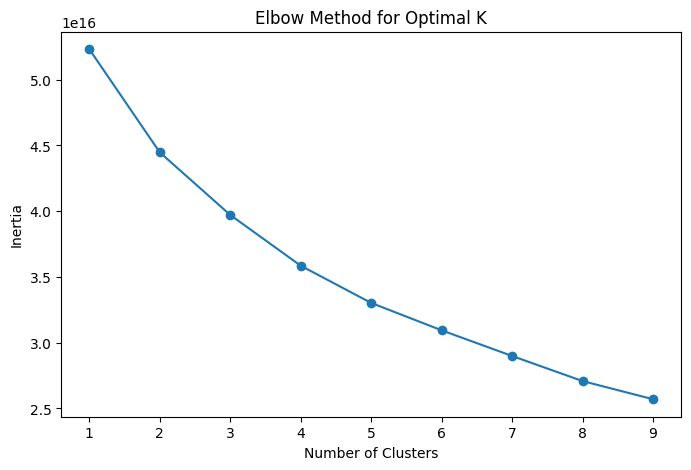

In [91]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df)

# Add clusters to the DataFrame
df['Cluster'] = clusters

# Evaluate clusters using Silhouette Score
silhouette_avg = silhouette_score(df.iloc[:, :-1], clusters)
print(f"Silhouette Score for K-Means: {silhouette_avg}")

# Elbow Method Visualization
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df.iloc[:, :-1])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(numerical_data)

# Add clusters to the DataFrame
numerical_data['Cluster'] = clusters

# Evaluate clusters using Silhouette Score
silhouette_avg = silhouette_score(data_normalized.iloc[:, :-1], clusters)
print(f"Silhouette Score for K-Means: {silhouette_avg}")

In [ ]:
# 3D Visualization of K-Means Clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_normalized['num_ingredients'],
                     data_normalized['num_steps'],
                     data_normalized['cooking_time'],
                     c=numerical_data['Cluster'], cmap='viridis')
ax.set_title('3D Visualization of Clusters')
ax.set_xlabel('Number of Ingredients')
ax.set_ylabel('Number of Steps')
ax.set_zlabel('Cooking Time (Normalized)')
plt.colorbar(scatter)
plt.show()

In [ ]:
# Classification Example: Map clusters to labels
data['Complexity'] = data_normalized['Cluster'].map({0: 'Simple', 1: 'Moderate', 2: 'Complex'})
print(data[['title', 'Complexity']].head())

# Optionally, implement regression to predict a complexity score here.

In [ ]:
from sklearn.mixture import GaussianMixture
import pandas as pd

# Step 1: Ensure `data_normalized` contains only numerical values
# Drop or exclude any non-numerical columns if present
numerical_data = data_normalized.select_dtypes(include=['number'])

# Step 2: Fit GMM
gmm = GaussianMixture(n_components=3, random_state=42)  # Adjust the number of components
gmm_clusters = gmm.fit_predict(numerical_data)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Define a range of n_components to test
components_range = range(1, 11)  # For example, try between 1 and 10 components

# Initialize lists to store AIC and BIC values
aic_values = []
bic_values = []

# Fit a GMM for each n_components and compute AIC and BIC
for n in components_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(numerical_data)
    aic_values.append(gmm.aic(numerical_data))
    bic_values.append(gmm.bic(numerical_data))

# Plot AIC and BIC scores
plt.figure(figsize=(10, 6))
plt.plot(components_range, aic_values, label='AIC', marker='o')
plt.plot(components_range, bic_values, label='BIC', marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.title('AIC and BIC Scores for Different GMM Components')
plt.legend()
plt.show()# Print the optimal number of components based on AIC and BIC
optimal_components_aic = components_range[np.argmin(aic_values)]
optimal_components_bic = components_range[np.argmin(bic_values)]

print(f"Optimal number of components based on AIC: {optimal_components_aic}")
print(f"Optimal number of components based on BIC: {optimal_components_bic}")

In [ ]:
from sklearn.mixture import GaussianMixture
import pandas as pd

# Step 1: Ensure `data_normalized` contains only numerical values
# Drop or exclude any non-numerical columns if present
numerical_data = data_normalized.select_dtypes(include=['number'])

# Step 2: Fit GMM
gmm = GaussianMixture(n_components=4, random_state=42)  # Adjust the number of components
gmm_clusters = gmm.fit_predict(numerical_data)

# Step 3: Add cluster labels to the original DataFrame
data_normalized['GMM_Cluster'] = gmm_clusters

# Step 4: Map GMM cluster labels to descriptive names
cluster_mapping = {
    0: 'Simple',
    1: 'Moderate',
    2: 'Hard',
    3: 'Very Hard'
    
}
data_normalized['Cluster_Name'] = data_normalized['GMM_Cluster'].map(cluster_mapping)

# Step 5: View the first few rows with cluster names
print(data_normalized[['GMM_Cluster', 'Cluster_Name']].head())

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # Ensure you import this for 3D plotting

# 3D Visualization of GMM Clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for GMM clusters
scatter = ax.scatter(
    data_normalized['num_ingredients'], 
    data_normalized['num_steps'],      
    data_normalized['cooking_time'],   
    c=data_normalized['GMM_Cluster'],   # Use the GMM cluster labels
    cmap='cool'  # Use a different colormap if desired
)

# Add titles and labels
ax.set_title('3D Visualization of GMM Clusters')
ax.set_xlabel('Number of Ingredients')
ax.set_ylabel('Number of Steps')
ax.set_zlabel('Cooking Time (Normalized)')

# Add a color bar to show cluster assignments
plt.colorbar(scatter, ax=ax, label='GMM Cluster')

# Show the plot
plt.show()

In [ ]:
import hdbscan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Assuming `data_normalized` is your preprocessed DataFrame (normalized/scaled)

# Step 1: Run HDBSCAN directly on the normalized data (no PCA)
hdbscan_clusterer = hdbscan.HDBSCAN(min_samples=5, min_cluster_size=100000, gen_min_span_tree=True)
cluster_labels = hdbscan_clusterer.fit_predict(numerical_data)

# Step 2: Add clusters back to the dataset
data_with_clusters = numerical_data.copy()
data_with_clusters['Cluster'] = cluster_labels

# Step 3: Sample data for visualization (to avoid overcrowding)
plot_sample = data_with_clusters.sample(n=10000, random_state=42)

# Step 4: Create 3D visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Select the first three columns for 3D visualization, if they exist
x = plot_sample.iloc[:, 0]
y = plot_sample.iloc[:, 1]
z = plot_sample.iloc[:, 2]
# Scatter plot
scatter = ax.scatter(x, y, z, c=plot_sample['Cluster'], cmap='tab10', s=30, alpha=0.9)

# Set axis labels
ax.set_title("HDBSCAN Clusters Visualized (3D)")
ax.set_xlabel("num_ingredients 1")
ax.set_ylabel("num_steps")
ax.set_zlabel("cooking_time")

# Add a colorbar for the clusters
plt.colorbar(scatter)

# Modify the legend to show only unique clusters
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = sorted(set(cluster_labels))  # Sort cluster labels for clarity
new_labels = [f"Cluster {label}" if label >= 0 else "Noise" for label in unique_labels]
plt.legend(handles[:len(unique_labels)], new_labels, title="Cluster", loc='upper right', bbox_to_anchor=(1.25, 1))

plt.show()

# Step 5: Print cluster sizes
cluster_counts = data_with_clusters['Cluster'].value_counts()
print(cluster_counts)

In [ ]:
#comparaison
#Higher Silhouette Score indicates better clustering.
from sklearn.metrics import silhouette_score

# Compute silhouette scores
silhouette_scores = {
    "K-Means": silhouette_score(data_normalized.iloc[:, :-1], clusters),
    "GMM": silhouette_score(data_normalized.iloc[:, :-1], gmm_clusters),
    "HDBSCAN": silhouette_score(data_normalized.iloc[:, :-1], cluster_labels)
}
print("Silhouette Scores:")
print(silhouette_scores)

In [ ]:
#Higher Calinski-Harabasz Score indicates better-defined clusters.
from sklearn.metrics import calinski_harabasz_score

# Compute Calinski-Harabasz scores
calinski_harabasz_scores = {
    "K-Means": calinski_harabasz_score(data_normalized.iloc[:, :-1], clusters),
    "GMM": calinski_harabasz_score(data_normalized.iloc[:, :-1], gmm_clusters),
    "HDBSCAN": calinski_harabasz_score(data_normalized.iloc[:, :-1], cluster_labels)
}
print("Calinski-Harabasz Scores:")
print(calinski_harabasz_scores)
#It is sensitive to the size of the dataset; larger datasets or datasets with many clusters often have much higher scores.

In [ ]:
#Lower Davies-Bouldin Index indicates better separation.
#lower intra-cluster distances and higher inter-cluster separation)
from sklearn.metrics import davies_bouldin_score

# Compute Davies-Bouldin scores
davies_bouldin_scores = {
    "K-Means": davies_bouldin_score(data_normalized.iloc[:, :-1], clusters),
    "GMM": davies_bouldin_score(data_normalized.iloc[:, :-1], gmm_clusters),
    
    "HDBSCAN": davies_bouldin_score(data_normalized.iloc[:, :-1], cluster_labels)
}
print("Davies-Bouldin Scores:")
print(davies_bouldin_scores)